## Regressions

In [1]:
import pandas as pd

csv_file = "data/diabetes_clean.csv"

diabetes_df = pd.read_csv(csv_file, sep=',')

In [2]:
diabetes_df.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

In [3]:
# diabetes_df.describe()

In [4]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

print(X.shape, y.shape)
X

(768, 8) (768,)


array([[ 6.   , 72.   , 35.   , ...,  0.627, 50.   ,  1.   ],
       [ 1.   , 66.   , 29.   , ...,  0.351, 31.   ,  0.   ],
       [ 8.   , 64.   ,  0.   , ...,  0.672, 32.   ,  1.   ],
       ...,
       [ 5.   , 72.   , 23.   , ...,  0.245, 30.   ,  0.   ],
       [ 1.   , 60.   ,  0.   , ...,  0.349, 47.   ,  1.   ],
       [ 1.   , 70.   , 31.   , ...,  0.315, 23.   ,  0.   ]])

In [5]:
X_bmi = X[:, 4]
print(X_bmi.shape, y.shape)
X_bmi

(768,) (768,)


array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1,  0. , 19.4, 24.2, 24.4, 33.7, 34.7,
       23. , 37.7, 46.8, 40.5, 41.5,  0. , 32.9, 25. , 25.4, 32.8, 29. ,
       32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32. , 24.7, 32.6,
       37.7, 43.2, 25. , 22.4,  0. , 29.3, 24.6, 48.8, 32.4, 36.6, 38.5,
       37.1, 26.5, 19.1, 32. , 46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7,
       49.7, 39. , 26.1, 22.5, 26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4,
       33.3, 34. , 31.2, 34. , 30.5, 31.2, 34. , 33.7, 28.2, 23.2, 53.2,
       34.2, 33.6, 26.8, 33.3, 55. , 42.9, 33.3, 34.5, 27.9, 29.7, 33.3,
       34.5, 38.3, 21.1, 33.8, 30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5,
       32.4, 32.8,  0. , 32.8, 30.5, 33.7, 27.3, 37

In [6]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
X_bmi

(768, 1)


array([[33.6],
       [26.6],
       [23.3],
       [28.1],
       [43.1],
       [25.6],
       [31. ],
       [35.3],
       [30.5],
       [ 0. ],
       [37.6],
       [38. ],
       [27.1],
       [30.1],
       [25.8],
       [30. ],
       [45.8],
       [29.6],
       [43.3],
       [34.6],
       [39.3],
       [35.4],
       [39.8],
       [29. ],
       [36.6],
       [31.1],
       [39.4],
       [23.2],
       [22.2],
       [34.1],
       [36. ],
       [31.6],
       [24.8],
       [19.9],
       [27.6],
       [24. ],
       [33.2],
       [32.9],
       [38.2],
       [37.1],
       [34. ],
       [40.2],
       [22.7],
       [45.4],
       [27.4],
       [42. ],
       [29.7],
       [28. ],
       [39.1],
       [ 0. ],
       [19.4],
       [24.2],
       [24.4],
       [33.7],
       [34.7],
       [23. ],
       [37.7],
       [46.8],
       [40.5],
       [41.5],
       [ 0. ],
       [32.9],
       [25. ],
       [25.4],
       [32.8],
       [29. ],
       [32

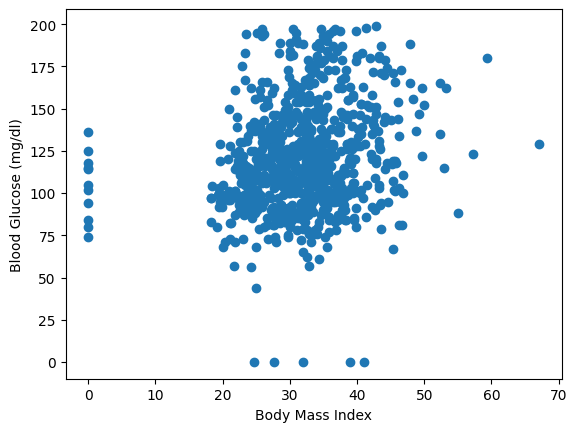

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()


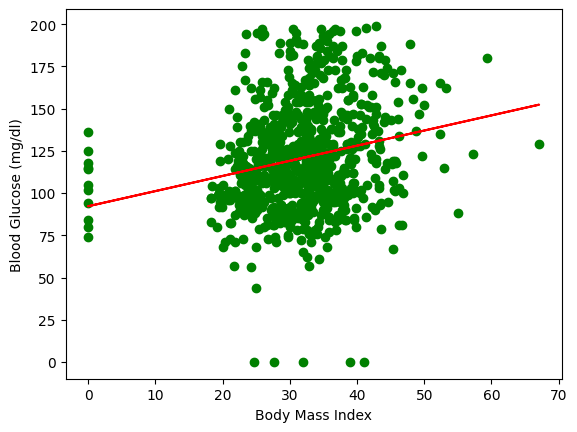

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y, color='green')
plt.plot(X_bmi, predictions, color='red')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)


In [10]:
reg_all.score(X_test, y_test)

0.2828046881037515

In [11]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)


26.34145958223226

### Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)


In [13]:
import numpy as np

print(cv_results)
#[0.70262578, 0.7659624, 0.75188205, 0.76914482, 0.72551151, 0.73608277]
print(np.mean(cv_results), np.std(cv_results))
# 0.7418682216666667 0.023330243960652888
print(np.quantile(cv_results, [0.025, 0.975]))
# array([0.7054865, 0.76874702])


[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
0.3190969786734477 0.07015320610114195
[0.24088592 0.41580685]
